In [12]:
import random 
import numpy as np 
import pandas as pd 
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
% matplotlib inline
print('Libraries imported.')

Libraries imported.


## Importing Data of California housing 
### Displaying first 5 rows

In [26]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0
body = client_53416b9db1b741d6aad479f9e3d76df4.get_object(Bucket='capstone-donotdelete-pr-ajwuhdpthlv4jt',Key='DATA.csv')['Body']
df1 = pd.read_csv(body)
df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Neighbourhood
0,-122.29,37.83,52,1121,211.0,554,187,3.3929,75700,Berkley
1,-122.29,37.82,49,135,29.0,86,23,6.1183,75000,Berkley
2,-122.29,37.81,50,760,190.0,377,122,0.9011,86100,Berkley
3,-122.29,37.80,52,1027,244.0,492,147,2.6094,81300,Berkley
4,-122.27,37.79,27,1055,347.0,718,302,2.6354,187500,Berkley


## Plotting all the features

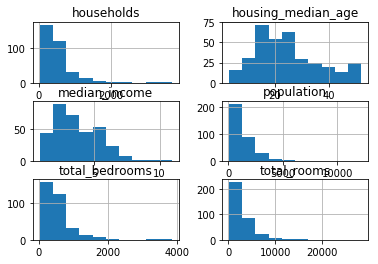

In [19]:
viz = df1[['total_rooms','housing_median_age','total_bedrooms','population','households','median_income','Neighbourhood']]
viz.hist()
plt.show()

## Analysisng how neighbourhood can affect the housing prices to check if their is a linear relation

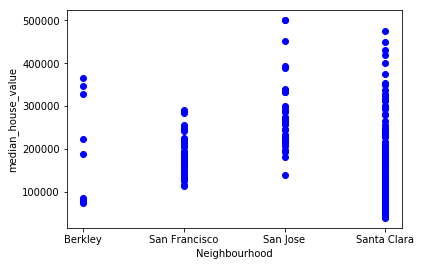

In [20]:
plt.scatter(df1.Neighbourhood, df1.median_house_value,  color='blue')
plt.xlabel("Neighbourhood")
plt.ylabel("median_house_value")
plt.show()

## Calculating Target variable with the help of independent variables

In [48]:
msk = np.random.rand(len(df1)) < 0.8
train = df1[msk]
test = df1[~msk]
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['total_rooms','housing_median_age','population','households','median_income']])
y = np.asanyarray(train[['median_house_value']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  8.00753857e+00   5.43301379e+02  -2.59172588e+01   4.60152704e+01
    4.42945627e+04]]


## Evaluation

In [49]:
y_hat= regr.predict(test[['total_rooms','housing_median_age','population','households','median_income']])
x = np.asanyarray(test[['total_rooms','housing_median_age','population','households','median_income']])
y = np.asanyarray(test[['median_house_value']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 2012614428.18
Variance score: 0.75


## Relation between actual and predicted value

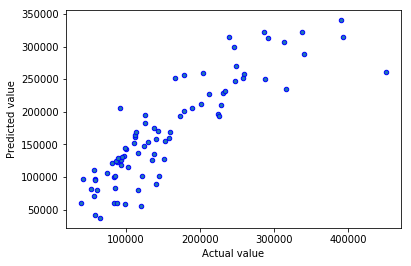

In [62]:
plt.scatter(y, y_hat, edgecolor='b', s=20, label="Samples")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

## Dropping insignificant columns and clearing data

In [23]:
df1.drop(['total_bedrooms'], axis = 1, inplace=True)
df1.drop(['total_rooms'], axis = 1, inplace=True)
df1.drop(['median_income'], axis = 1, inplace=True)
df1.drop(['housing_median_age'], axis = 1, inplace=True)

## Displaying total rows and columns

In [24]:
df1.shape

(346, 6)

## Displaying table after clearing table

In [23]:
df1.head()

,longitude,latitude,population,households,median_house_value,Neighbourhood
0,-122.29,37.83,554,187,75700,Berkley
1,-122.29,37.82,86,23,75000,Berkley
2,-122.29,37.81,377,122,86100,Berkley
3,-122.29,37.80,492,147,81300,Berkley
4,-122.27,37.79,718,302,187500,Berkley


## Importing necesarry libraries

In [ ]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
print('Installed')

## Displaying the map of california with different housing venues
### Popping labels as per proximity to ocean

In [25]:
map_california = folium.Map(location=[df1["latitude"][0], df1["longitude"][0]], zoom_start=10)

# add markers to map
for lat, lng, Neighbourhood in zip(df1['latitude'], df1['longitude'], df1['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_california)  
    
map_california

## Accessing Foresquare API

In [19]:
CLIENT_ID = 'VJXDDL2UI03EN3ODJHKZ2QVXK5PSO5GXGA00DGMMT3WKEJEY' # your Foursquare ID
CLIENT_SECRET = 'MOSD2EVSDCKCLEC141IQSA1VNNIIQR1PF0NF1FSN3XFQ4JPX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VJXDDL2UI03EN3ODJHKZ2QVXK5PSO5GXGA00DGMMT3WKEJEY
CLIENT_SECRET:MOSD2EVSDCKCLEC141IQSA1VNNIIQR1PF0NF1FSN3XFQ4JPX


## Exploring Neighbourhood

In [28]:
# Get data of first neighborhood
neighborhood_latitude = df1['latitude'][0] # neighborhood latitude value
neighborhood_longitude = df1['longitude'][0] # neighborhood longitude value

neighborhood_name = df1['Neighbourhood'][0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Berkley are 37.83, -122.29.


In [29]:
# Setup API URL to explore venues near by
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
neighborhood_json = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = neighborhood_json['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Rudy's Can't Fail Cafe,Diner,37.830967,-122.285919
1,Starbucks,Coffee Shop,37.828373,-122.289248
2,IKEA Swedish Food Market,Scandinavian Restaurant,37.831466,-122.292353
3,Eastbay Badminton Association,Stadium,37.831568,-122.289200
4,West Elm,Furniture / Home Store,37.833370,-122.293117


## Generalizing data more to get a clean reading format

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Getting Venue for all neighbourhoods

In [33]:
#Get all Cal
california_venues_df = getNearbyVenues(names=df1['Neighbourhood'],
                                   latitudes=df1['latitude'],
                                   longitudes=df1['longitude']
                                  )

Berkley
Berkley
Berkley
Berkley
Berkley
Berkley
Berkley
Berkley
Berkley
Berkley
San Jose
San Jose
San Francisco
San Jose
San Francisco
San Jose
San Francisco
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Francisco
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
Santa Clara
San Jose
San Jose
Santa Clara
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
San Jose
Santa Clara
San Jose
Santa Clara
Santa Clara
Santa Clara
Santa Clara
San Jose
San Jose
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
San Jose
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
Santa Clara
San Jose
Santa C

In [34]:
california_venues_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berkley,37.83,-122.29,Rudy's Can't Fail Cafe,37.830967,-122.285919,Diner
1,Berkley,37.83,-122.29,Starbucks,37.828373,-122.289248,Coffee Shop
2,Berkley,37.83,-122.29,IKEA Swedish Food Market,37.831466,-122.292353,Scandinavian Restaurant
3,Berkley,37.83,-122.29,Eastbay Badminton Association,37.831568,-122.289200,Stadium
4,Berkley,37.83,-122.29,West Elm,37.833370,-122.293117,Furniture / Home Store


## Analysing Neighbourhoods 

In [35]:
# one hot encoding
cal_onehot = pd.get_dummies(california_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cal_onehot['Neighborhood'] = california_venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cal_onehot.columns[-1]] + list(cal_onehot.columns[:-1])
cal_onehot = cal_onehot[fixed_columns]
cal_onehot.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Casino,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fireworks Store,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightlife Spot,Noodle House,Notary,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Roller Rink,Sake Bar,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Used Bookstore,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Berkley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
cal_grouped = cal_onehot.groupby('Neighborhood').mean().reset_index()

# Displaying top 5 venues in different cities of California

In [37]:
num_top_venues = 5

for hood in cal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cal_grouped[cal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berkley----
                    venue  freq
0             Coffee Shop  0.04
1  Furniture / Home Store  0.04
2              Food Truck  0.03
3    Gym / Fitness Center  0.03
4                     Gym  0.03


----San Francisco----
                venue  freq
0  Mexican Restaurant  0.07
1         Pizza Place  0.04
2  Chinese Restaurant  0.04
3        Liquor Store  0.04
4    Asian Restaurant  0.03


----San Jose----
               venue  freq
0               Park  0.05
1  Convenience Store  0.04
2             Bakery  0.03
3        Coffee Shop  0.03
4     Sandwich Place  0.03


----Santa Clara----
                venue  freq
0         Coffee Shop  0.04
1  Mexican Restaurant  0.04
2         Pizza Place  0.04
3      Sandwich Place  0.03
4      Ice Cream Shop  0.02




In [38]:
#method to sort venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [92]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cal_grouped['Neighborhood']

for ind in np.arange(cal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berkley,Coffee Shop,Furniture / Home Store,Park,Dance Studio,Gym / Fitness Center,Gym,Pizza Place,Food Truck,Thai Restaurant,Diner
1,San Francisco,Mexican Restaurant,Chinese Restaurant,Liquor Store,Pizza Place,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Park,Coffee Shop,Bar
2,San Jose,Park,Convenience Store,Coffee Shop,Bakery,Sandwich Place,Indian Restaurant,Gym / Fitness Center,Pizza Place,Salon / Barbershop,Grocery Store
3,Santa Clara,Coffee Shop,Mexican Restaurant,Pizza Place,Sandwich Place,Convenience Store,Ice Cream Shop,Park,Bar,American Restaurant,Bakery


# Clustering Neighbourhoods

In [93]:
# set number of clusters
kclusters = int(len(df1["Neighbourhood"].unique()))
cal_grouped_clustering = cal_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(cal_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clusters-Labels', kmeans.labels_)

cal_merged = df1.copy()
cal_merged.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cal_merged = cal_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
cal_merged.head() # check the last columns!

,longitude,latitude,population,households,median_house_value,Neighborhood,Clusters-Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-122.29,37.83,554,187,75700,Berkley,1,Coffee Shop,Furniture / Home Store,Park,Dance Studio,Gym / Fitness Center,Gym,Pizza Place,Food Truck,Thai Restaurant,Diner
1,-122.29,37.82,86,23,75000,Berkley,1,Coffee Shop,Furniture / Home Store,Park,Dance Studio,Gym / Fitness Center,Gym,Pizza Place,Food Truck,Thai Restaurant,Diner
2,-122.29,37.81,377,122,86100,Berkley,1,Coffee Shop,Furniture / Home Store,Park,Dance Studio,Gym / Fitness Center,Gym,Pizza Place,Food Truck,Thai Restaurant,Diner
3,-122.29,37.80,492,147,81300,Berkley,1,Coffee Shop,Furniture / Home Store,Park,Dance Studio,Gym / Fitness Center,Gym,Pizza Place,Food Truck,Thai Restaurant,Diner
4,-122.27,37.79,718,302,187500,Berkley,1,Coffee Shop,Furniture / Home Store,Park,Dance Studio,Gym / Fitness Center,Gym,Pizza Place,Food Truck,Thai Restaurant,Diner


In [96]:
# create map
map_clusters = folium.Map(location=[df1["latitude"][0], df1["longitude"][0]], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cal_merged['latitude'], cal_merged['longitude'], cal_merged['Neighborhood'], cal_merged['Clusters-Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters